# Part 1 : Football

### Import nessessory libraries

mplsoccer is a Python library for plotting soccer/football charts in Matplotlib and loading StatsBomb open-data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from IPython.display import Image
import math
import seaborn as sns
from sklearn.utils import shuffle

## Preprocessing football data

### Load the data

In [6]:
football_data = pd.read_csv("football.csv")


### Drop duplicated instances

In [7]:
football_data.drop_duplicates(inplace=True)

### Adding new features

We are going to add multiple features to our dataset.
 - **Distance of the shot**: Adding the distance between where the ball shooted and the center of goal. The distance formula using coordinates $(x_1, y_1)$ and $(x_2, y_2)$ is:
 
 
 $ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $
 
 that the $(x_2, y_2)$ is the center of goal coordinates. In our data set it is (0, 0)
 
 - **Angle of the shot**: The second thing to consider when it comes to evaluating a shot is the view the player has of the goal: the more he or she can see, the better your chance of scoring.
 
 
 $tan(a) = \frac{7.32x}{x^2 + y^2 - \left(\frac{7.32}{2}\right)^2}$

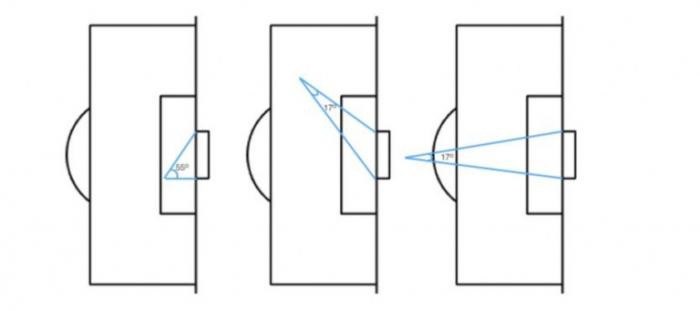

In [8]:
Image(filename = 'images/GoalAngleMultiple.jpeg')
#source: https://soccermatics.readthedocs.io/en/latest/lesson2/GeometryOfShooting.html

In [9]:
def distance(x, y):
    return math.sqrt(x**2 + y**2)

def angle(x, y):
    numerator = 7.32 * x
    denominator = x**2 + y**2 - (7.32/2)**2
    a_radians = math.atan(numerator / denominator)
    a_degrees = math.degrees(a_radians)
    return a_degrees

In [10]:
football_data['angle'] = football_data.apply(lambda row: angle(row['x'], row['y']), axis=1)
football_data['distance'] = football_data.apply(lambda row: distance(row['x'], row['y']), axis=1)

In [11]:
football_data.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,angle,distance
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,18.544088,17.530810
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,13.982592,17.090313
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper,14.153255,29.456534
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,15.458384,26.948560
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,31.315918,11.932141


### Missisng Value

In [12]:
missing_values = football_data.isna().any()
print(missing_values[missing_values].index.tolist())

['interferenceOnShooter', 'outcome']


The two columns 'interferenceOnShooter' and 'outcome' have missing values.

In [13]:
missing_values_outcome = football_data['outcome'].isna().sum()
missing_values_interferenceOnShooter = football_data['interferenceOnShooter'].isna().sum()

total_missing_samples = (football_data['outcome'].isna() | football_data['interferenceOnShooter'].isna()).sum()

print("Number of missing values in column outcome:", missing_values_outcome)
print("Number of missing values in column B:", missing_values_interferenceOnShooter)
print("Total number of samples with missing values:", total_missing_samples)

Number of missing values in column outcome: 34
Number of missing values in column B: 34
Total number of samples with missing values: 34


The 0.003 of the samples in our data dataset has missing value so can easily drop them becuase it has not even small effect on the predictions.

In [14]:
football_data.dropna(inplace=True)
print(football_data.shape)

(8891, 14)


### Encoding Categorical variables

We have two approaches for encoding categorical variables.
 - **One-Hot Encoding**:
 - **Assigning numerical values**:

## Preprocessing the data

# 2. Multivariate Regression Implementation

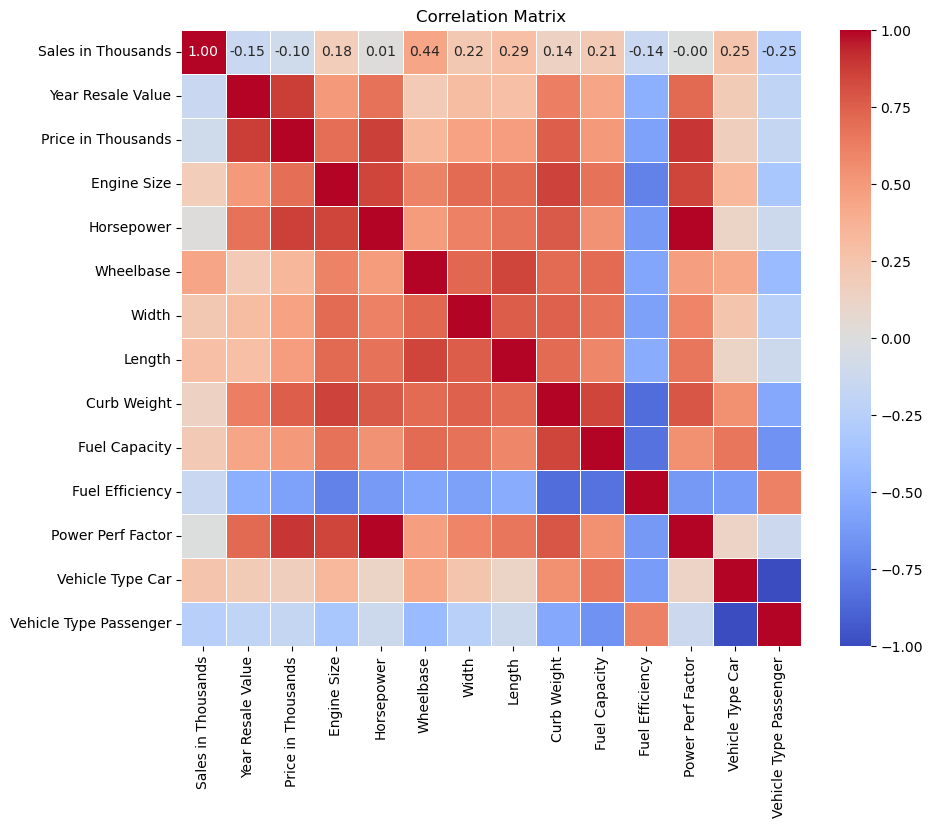

In [2]:
data = pd.read_csv('cars.csv')

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


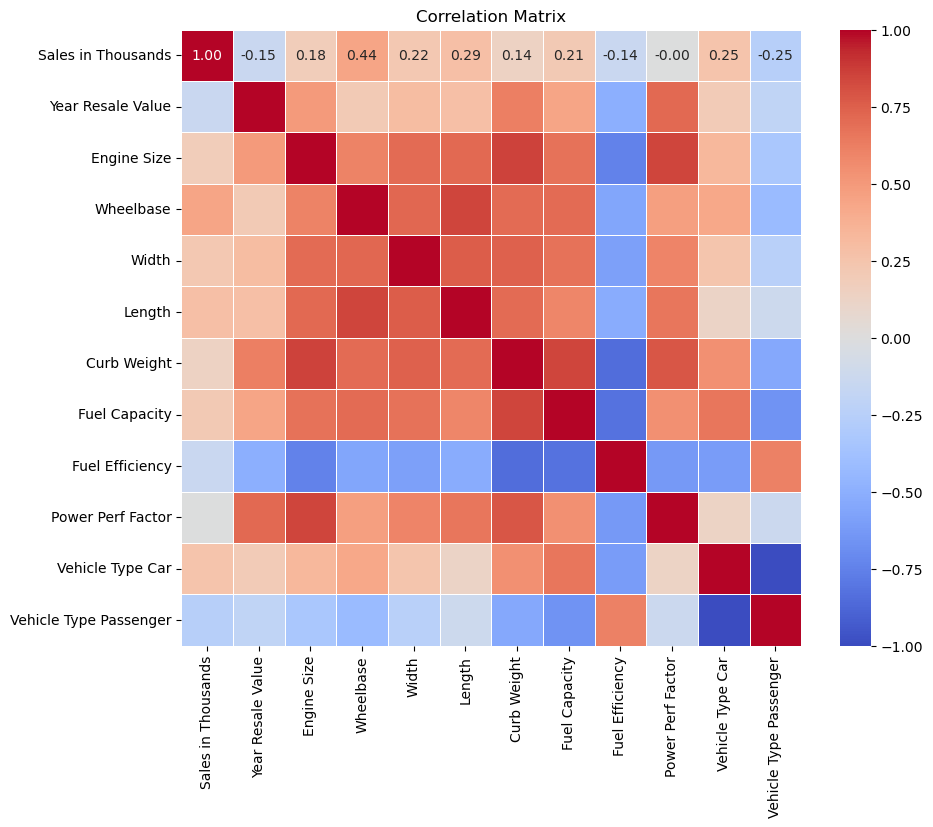

In [3]:
correlation_matrix = data.drop(columns=["Price in Thousands", "Horsepower"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


def preprocess_train_test_gradient(X, y, target_names, alpha, iterations):
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    X = np.hstack((np.ones((len(y), 1)), X))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555)
    
    theta = np.zeros((X_train.shape[1], y_train.shape[1]))
    theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)
    predictions = X_test.dot(theta)
    
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error on Test Set:", mse)
    
    r_squared = r2_score(y_test, predictions)
    print("R-squared Score on Test Set:", r_squared)

    plt.plot(cost_history)
    plt.title('Cost History')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

    for i in range(y_train.shape[1]):
        plt.scatter(y_test[:, i], predictions[:, i])
        plt.plot([min(y_test[:, i]), max(y_test[:, i])], [min(y_test[:, i]), max(y_test[:, i])], color='red', linestyle='--')
        plt.title(f'Actual vs Predicted (Test Set) - {target_names[i]}')
        plt.xlabel(f'Actual {target_names[i]}')
        plt.ylabel(f'Predicted {target_names[i]}')
        plt.show()

def compute_cost(X, y, theta):
    m = len(y)
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        theta = theta - (alpha / m) * X.T.dot(X.dot(theta) - y)
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history


Mean Squared Error on Test Set: 8.288166281921935
R-squared Score on Test Set: 0.9179024220266797


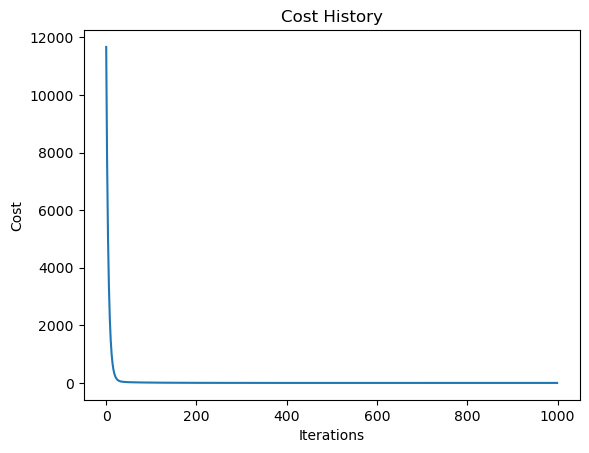

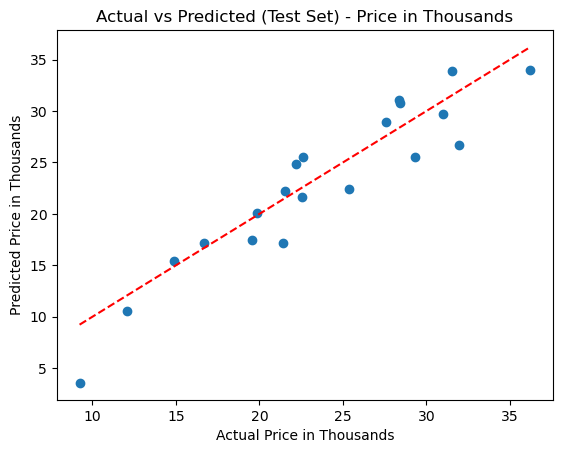

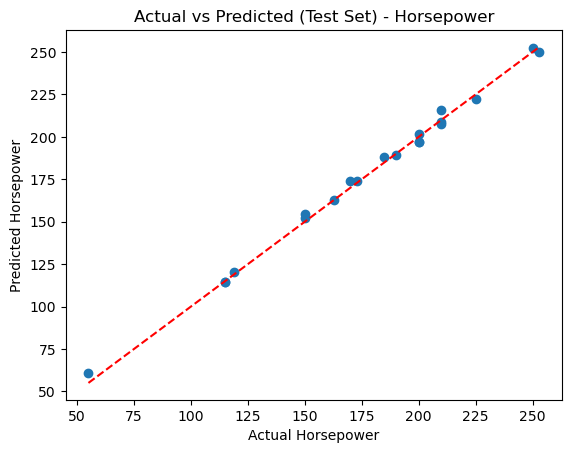

In [5]:
data = pd.read_csv('cars.csv')
data.drop_duplicates(inplace=True)
data = shuffle(data)

X = data.drop(columns=["Price in Thousands", "Horsepower"])
y = data[["Price in Thousands", "Horsepower"]].values
target_names = ["Price in Thousands", "Horsepower"]

preprocess_train_test_gradient(X, y, target_names, alpha=0.1, iterations=1000)

# 3.Manual K-Fold Cross Validation Implementation

In [10]:
def k_fold_cross_validation(X, y, k, alpha, iterations):
    m = len(y)
    fold_size = m // k
    validation_costs = []

    for i in range(k):
        start = i * fold_size
        end = start + fold_size

        X_train = np.concatenate([X[:start], X[end:]])
        y_train = np.concatenate([y[:start], y[end:]])

        X_val = X[start:end]
        y_val = y[start:end]

        theta = np.zeros((X.shape[1], 1))
        theta, _ = gradient_descent(X_train, y_train, theta, alpha, iterations)

        val_cost = compute_cost(X_val, y_val, theta)
        print(val_cost)
        validation_costs.append(val_cost)

    return theta, np.mean(validation_costs)

alpha = 0.01
iterations = 100000
k = 10

X_price = data.drop(columns=['Price in Thousands']).values
y_price = data['Price in Thousands'].values.reshape(-1, 1)

X_price = (X_price - np.mean(X_price, axis=0)) / np.std(X_price, axis=0)
X_price = np.hstack((np.ones((len(y), 1)), X_price))

theta, mean_validation_cost = k_fold_cross_validation(X_price, y_price, k, alpha, iterations)
print("Mean validation cost:", mean_validation_cost)

0.7412465687935683
0.40042502155320314
0.3538681747760956
0.2277157984513734
0.3662539477454486
0.24893985925681283
0.10163586169781562
0.7042383349745795
0.5755391818666522
0.38303280462118505
Mean validation cost: 0.4102895553736734


# 4. Comparison with Built-in Python Libraries

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('cars.csv')

X = data.drop(columns=["Price in Thousands", "Horsepower"])
y = data[["Price in Thousands", "Horsepower"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.87, random_state=555)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

Mean Squared Error: 14.046281185038593
R-squared: 0.8327514727465126


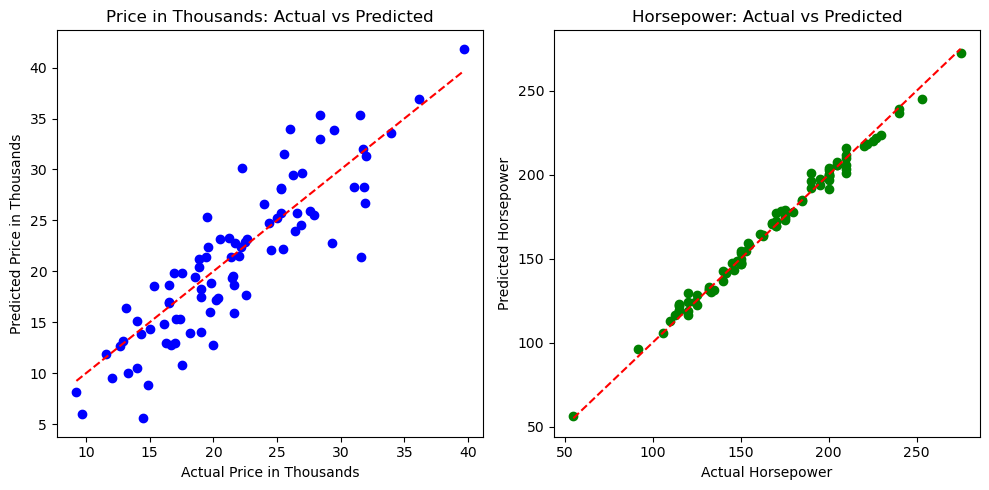

In [13]:
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test["Price in Thousands"], y_pred[:, 0], color='blue')
plt.plot([min(y_test["Price in Thousands"]), max(y_test["Price in Thousands"])], 
         [min(y_test["Price in Thousands"]), max(y_test["Price in Thousands"])], 
         color='red', linestyle='--')
plt.xlabel("Actual Price in Thousands")
plt.ylabel("Predicted Price in Thousands")
plt.title("Price in Thousands: Actual vs Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_test["Horsepower"], y_pred[:, 1], color='green')
plt.plot([min(y_test["Horsepower"]), max(y_test["Horsepower"])], 
         [min(y_test["Horsepower"]), max(y_test["Horsepower"])], 
         color='red', linestyle='--')
plt.xlabel("Actual Horsepower")
plt.ylabel("Predicted Horsepower")
plt.title("Horsepower: Actual vs Predicted")

plt.tight_layout()
plt.show()


### K fold cross validation comparaion


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
cv_scores = cross_val_score(model, X_price, y_price, cv=k, scoring='neg_mean_squared_error')

# Convert negative mean squared errors to positive values
cv_scores = -cv_scores

mean_cv_score_sklearn = np.mean(cv_scores)
print(f'Mean validation error using scikit-learn:" {mean_cv_score_sklearn:.10f}')

print("Mean validation error using custom implementation:", mean_validation_cost)

Mean validation error using scikit-learn:" 0.0000000000
Mean validation error using custom implementation: 0.4102895553736734


## Questions

### **4. Advantages and Disadvantages of k-fold Cross-Validation:**

Advantages:
- **Better Utilization of Data**: It allows each observation to be used for both training and validation, maximizing the use of available data.
- **More Reliable Estimate**: It provides a more reliable estimate of model performance compared to simple train-test splits.
- **Reduced Variance**: By averaging the results of multiple folds, it reduces the variance of the estimated performance metric.

Disadvantages:
- **Computational Cost**: It requires fitting the model multiple times, which can be computationally expensive for large datasets or complex models.
- **Variance Bias Trade-off**: The choice of k can introduce a bias-variance trade-off. Smaller values of k result in higher bias but lower variance, and vice versa.
- **Sensitive to Data Imbalance**: If the dataset is imbalanced, i.e., one class is significantly larger or smaller than others, k-fold cross-validation may lead to biased performance estimates.

**Other Types of Cross-Validation Methods:**

1. **Leave-One-Out Cross-Validation (LOOCV)**: In LOOCV, one data point is used as the validation set while the rest are used for training. This process is repeated for each data point. It has a higher computational cost but can provide less biased estimates, especially for smaller datasets.

2. **Stratified k-fold Cross-Validation**: This method ensures that each fold has the same proportion of target classes as the entire dataset. It is particularly useful for imbalanced datasets.

3. **Repeated k-fold Cross-Validation**: It involves repeating k-fold cross-validation multiple times with different random splits. This helps to reduce the variability of the performance estimate.

4. **Nested Cross-Validation**: It is used for model selection and hyperparameter tuning within each fold of the cross-validation process. It helps to prevent overfitting of the hyperparameters to the test set.

### **5. Evaluation Metrics for Manual Implementations:**

For multivariate regression:
- **Mean Squared Error (MSE)**: It measures the average squared difference between the predicted values and the actual values. It is commonly used for regression problems as it penalizes large errors more heavily.

For k-fold cross-validation:
- **Mean Validation Error**: This is the average of the validation errors obtained across all folds. It provides an overall measure of the model's performance across different subsets of the data.

These metrics were chosen because:
- They are commonly used for evaluating regression models and cross-validation techniques.
- MSE is a well-established measure of prediction accuracy for regression models.
- Mean validation error provides a comprehensive assessment of the model's performance across multiple validation sets.